# Neural Network Predictive Model
* In this notebook we will construct neural networks in order to predict the valence of songs.

## Import packages
* To begin with, we will import the packages, that we will use in the following segments of the project:
    * [pandas](https://pandas.pydata.org/)
    * [NumPy](https://www.numpy.org/)
    * [TensorFlow](https://www.tensorflow.org/)
    * [Keras](https://www.tensorflow.org/api_docs/python/tf/keras)
* Note that the prementioned packages **must be locally installed too** in order to be used.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import SVG, display

from tensorflow.keras.utils import model_to_dot
import tensorflow as tf
from tensorflow.keras import Model, Sequential, Input, regularizers

## Datasets Loading
* We will also load the datasets that we created in the <code>non_nn_predictive.ipynb</code> notebook, as we will use them to train and evaluate our neural networks.

In [2]:
all_X_train = pd.read_csv('data/datasets/all/all_X_train.csv', index_col=0)
all_X_test = pd.read_csv('data/datasets/all/all_X_test.csv', index_col=0)
imp_X_train = pd.read_csv('data/datasets/important/imp_X_train.csv', index_col=0)
imp_X_test = pd.read_csv('data/datasets/important/imp_X_test.csv', index_col=0)
y_train = pd.read_csv('data/datasets/target/y_train.csv', index_col=0)
y_test = pd.read_csv('data/datasets/target/y_test.csv', index_col=0)

## Important-Columns Network
* In our first Network, we will use the important-dataset.
* It will be a simple one, and it will be constructed using only three **Dense Layers** and one for **Batch Normalization**.
* So let's create it.

In [3]:
imp_model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, 'sigmoid'),
    tf.keras.layers.Dense(16, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

imp_model.build((None, 36))
imp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 36)               144       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                1184      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,873
Trainable params: 1,801
Non-trainable params: 72
_________________________________________________________________


* Next, we will compile it using the **Adam** Optimizer.

In [4]:
imp_model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError())

* For our train we will use the [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) callback, that reduces the learning rate of the model during the train when it is stack.
* We will also use the [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback that stops the train of the model when no improvement is noticed for many epochs.

In [5]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=15, min_lr=0.00005)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

* Now we are ready to train the Neural Network.

In [6]:
imp_model.fit(imp_X_train, y_train, batch_size=64, epochs=400, validation_split=0.1, callbacks=[reduce_lr, early_stopping])

Epoch 1/400
619/619 [==============================] - 2s 2ms/step - loss: 0.1583 - val_loss: 0.1337 - lr: 0.0010
Epoch 2/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1298 - val_loss: 0.1248 - lr: 0.0010
Epoch 3/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1228 - val_loss: 0.1196 - lr: 0.0010
Epoch 4/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1185 - val_loss: 0.1153 - lr: 0.0010
Epoch 5/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1148 - val_loss: 0.1120 - lr: 0.0010
Epoch 6/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1121 - val_loss: 0.1089 - lr: 0.0010
Epoch 7/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1101 - val_loss: 0.1064 - lr: 0.0010
Epoch 8/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1085 - val_loss: 0.1055 - lr: 0.0010
Epoch 9/400
619/619 [==============================] - 1s 1ms/step - loss: 0.1072 - val_

619/619 [==============================] - 1s 1ms/step - loss: 0.0933 - val_loss: 0.0925 - lr: 7.0000e-04
Epoch 143/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0932 - val_loss: 0.0921 - lr: 7.0000e-04
Epoch 144/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0932 - val_loss: 0.0933 - lr: 7.0000e-04
Epoch 145/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0930 - val_loss: 0.0922 - lr: 7.0000e-04
Epoch 146/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0933 - val_loss: 0.0920 - lr: 7.0000e-04
Epoch 147/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0934 - val_loss: 0.0921 - lr: 7.0000e-04
Epoch 148/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0934 - val_loss: 0.0922 - lr: 7.0000e-04
Epoch 149/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0935 - val_loss: 0.0927 - lr: 7.0000e-04
Epoch 150/400
619/619 [==============================]

619/619 [==============================] - 1s 1ms/step - loss: 0.0917 - val_loss: 0.0916 - lr: 5.7648e-05
Epoch 279/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0918 - val_loss: 0.0916 - lr: 5.7648e-05
Epoch 280/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0915 - val_loss: 0.0916 - lr: 5.7648e-05
Epoch 281/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0916 - val_loss: 0.0917 - lr: 5.7648e-05
Epoch 282/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0917 - val_loss: 0.0917 - lr: 5.7648e-05
Epoch 283/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0916 - val_loss: 0.0915 - lr: 5.7648e-05
Epoch 284/400
619/619 [==============================] - 1s 995us/step - loss: 0.0915 - val_loss: 0.0916 - lr: 5.7648e-05
Epoch 285/400
619/619 [==============================] - 1s 1ms/step - loss: 0.0916 - val_loss: 0.0915 - lr: 5.7648e-05
Epoch 286/400
619/619 [=============================

* Let's now evaluate our trained model, using the test set.

In [11]:
imp_model.evaluate(imp_X_test, y_test)

344/344 [==============================] - 0s 700us/step - loss: 0.0917


0.09172344952821732

* The results are very good.
* It seems that the fact that we used a simple model in combination with a dataframe with a few but important variables achieved to capture important information and patterns.

## All-Columns Network
* Following an identical simple architecture, we will create a network that will take as input our dataset with all columns.
* Let's construct it.
* Again, we will use **Dense** and **Batch Normalization** layers.
* Because this one is stronger than before, we will also add a **Dropout** layer, to avoid overfit as much as possible.

In [12]:
all_model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, 'sigmoid'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

all_model.build((None, 135))
all_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 135)              540       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               17408     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                      

* Again we will use **Adam** as our Optimizer.

In [13]:
all_model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError())

* And we will do the training using the same callbacks as before.

In [14]:
all_model.fit(all_X_train, y_train, batch_size=64, epochs=300, validation_split=0.1, callbacks=[reduce_lr, early_stopping])

Epoch 1/300
619/619 [==============================] - 2s 2ms/step - loss: 0.1350 - val_loss: 0.1154 - lr: 0.0010
Epoch 2/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1159 - val_loss: 0.1037 - lr: 0.0010
Epoch 3/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1109 - val_loss: 0.1009 - lr: 0.0010
Epoch 4/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1073 - val_loss: 0.0993 - lr: 0.0010
Epoch 5/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1061 - val_loss: 0.0959 - lr: 0.0010
Epoch 6/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1033 - val_loss: 0.0940 - lr: 0.0010
Epoch 7/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1019 - val_loss: 0.0935 - lr: 0.0010
Epoch 8/300
619/619 [==============================] - 1s 2ms/step - loss: 0.1001 - val_loss: 0.0924 - lr: 0.0010
Epoch 9/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0997 - val_

619/619 [==============================] - 1s 2ms/step - loss: 0.0814 - val_loss: 0.0837 - lr: 3.4300e-04
Epoch 142/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0810 - val_loss: 0.0834 - lr: 3.4300e-04
Epoch 143/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0815 - val_loss: 0.0841 - lr: 3.4300e-04
Epoch 144/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0813 - val_loss: 0.0836 - lr: 3.4300e-04
Epoch 145/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0807 - val_loss: 0.0836 - lr: 3.4300e-04
Epoch 146/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0810 - val_loss: 0.0837 - lr: 3.4300e-04
Epoch 147/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0809 - val_loss: 0.0849 - lr: 2.4010e-04
Epoch 148/300
619/619 [==============================] - 1s 2ms/step - loss: 0.0811 - val_loss: 0.0831 - lr: 2.4010e-04
Epoch 149/300
619/619 [==============================]

In [15]:
all_model.evaluate(all_X_test, y_test)

344/344 [==============================] - 0s 880us/step - loss: 0.0846


0.08459849655628204

* The results here were pretty good again.
* These are the best results he have achieved till here.
* The architecture of this NN let it capture the more detailed information that was provided to it.

### RNN Network
* In our last network we will try to **mimic the function of the human brain**, when we listen to a song.
* In specific, we will try to take advantage of the time dimension of a song, using the segments that we have already taken, in the <code>data_preaparation.ipynb</code> notebook.
* We will do that using an [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layer.
* Then, we will combine the output of this layer with the most important audio features of the songs.

* First, we will load the <code>tracks</code> dataframe, as well as, the <code>analysis_array_start.npy</code> file that we created in the <code>data_preaparation.ipynb</code> notebook.

In [16]:
df = pd.read_csv('data/tracks.csv', index_col=0)
analysis_array_start = np.load('data/analysis_array_start.npy')

* Next, we have to create the input that we will use to feed our Network.
* So we will create a function to do that.
* We will use a tensorflow's [from_generator](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_generator) function.
* The generator will yield two inputs:
  * The one refers to the segments of the song.
  * The second refers to the audio features of the song.
* Here, it is important to notice that we will use only analyses data from the beginning of the songs, in order to not increase the execution time of LSTM which is already very large.

In [17]:
rnn_track_features = np.array(df.loc[:, ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration_ms']])
y = df['valence']
#https://stackoverflow.com/questions/63129357/passing-x-train-as-a-list-of-numpy-arrays-to-tf-data-dataset-is-not-working
def generate_rnn_dataset():

  def generator():
    for s1, s2, l in zip(analysis_array_start, rnn_track_features, y):
      yield {'input_1': s1, 'input_2': s2}, l

  dataset = tf.data.Dataset.from_generator(generator, 
                                           output_shapes=({'input_1': (200, 28), 'input_2': (6)}, ()),
                                           output_types=({'input_1': tf.float32, 'input_2': tf.float32}, tf.float32))
  dataset = dataset.batch(batch_size=64)
  AUTOTUNE = tf.data.experimental.AUTOTUNE
  dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)
  return dataset

* Now, we have to split our new dataset.

In [18]:
#https://stackoverflow.com/questions/51125266/how-do-i-split-tensorflow-datasets
full_rnn_dataset = generate_rnn_dataset()

DATASET_SIZE = len(list(full_rnn_dataset))
train_rnn_size = int(0.7 * DATASET_SIZE)
val_rnn_size = int(0.1 * DATASET_SIZE)
test_rnn_size = int(0.2 * DATASET_SIZE)

full_rnn_dataset = full_rnn_dataset.shuffle(DATASET_SIZE, seed=1)
train_rnn_dataset = full_rnn_dataset.take(train_rnn_size)
test_rnn_dataset = full_rnn_dataset.skip(train_rnn_size)
val_rnn_dataset = test_rnn_dataset.skip(test_rnn_size)
test_rnn_dataset = test_rnn_dataset.take(test_rnn_size)

len(list(train_rnn_dataset)), len(list(val_rnn_dataset)), len(list(test_rnn_dataset))

(602, 86, 172)

* Then, we will build our Network.
* It will have two branches, one for the segments and one for the audio features, that will merge into one.
* Again **Batch Normalization** and **Dropout** layers will be used.
* This archtiecture cannot be built using <code>Sequential</code>, so we will create it without it.

In [2]:
segments_input = tf.keras.Input(shape=(200, 28))
track_input = tf.keras.Input(shape=(6))

segment_analysis_branch =  tf.keras.layers.Masking(mask_value = 0.0)(segments_input)
segment_analysis_branch = tf.keras.layers.LSTM(64)(segment_analysis_branch)
segment_analysis_branch = Model(inputs=segments_input, outputs=segment_analysis_branch)

full_track_info = tf.keras.layers.concatenate([segment_analysis_branch.output, track_input])
full_track_info = tf.keras.layers.BatchNormalization()(full_track_info)
full_track_info = tf.keras.layers.Dropout(0.3)(full_track_info)

last_part = tf.keras.layers.Dense(32)(full_track_info)
last_part = tf.keras.layers.Dense(16, activation='tanh')(last_part)
last_part = tf.keras.layers.Dense(8)(last_part)
last_part = tf.keras.layers.Dense(1, activation='sigmoid')(last_part)

rnn_model = Model(inputs=[segments_input, track_input], outputs=last_part)

rnn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 28)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 200, 28)      0           ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 64)           23808       ['masking[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                            

* We will also create a visual representation of our network.

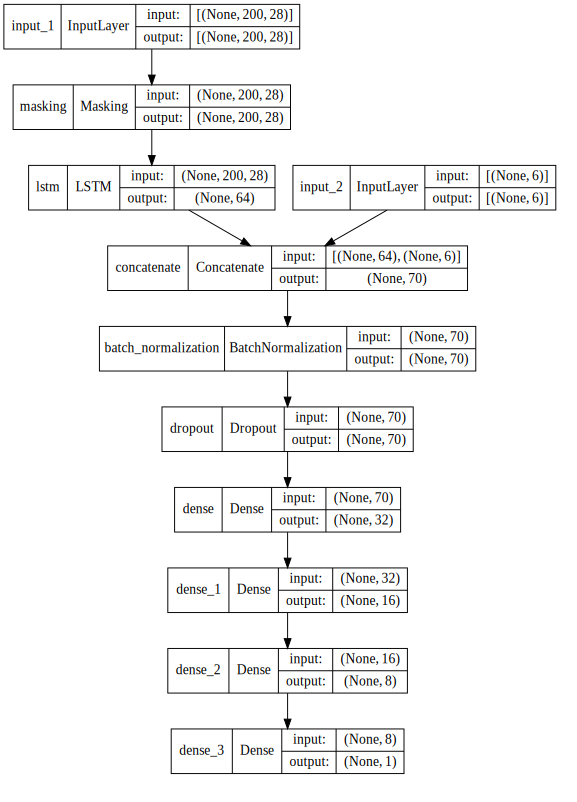

In [3]:
SVG(model_to_dot(rnn_model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

* Here, the training was extremely demanding.
* More than 100 epochs of training were executed.
* Each of them needed more than 10 minutes on Google Colab.
* So it is easy to understand that the training was split.
* In the <code>data/rnn_network/rnn_final</code> folder can be found the trained network, and we will load it here.

In [21]:
rnn_model = tf.keras.models.load_model('data/rnn_network/rnn_final')

* And we will do the evaluation.

In [22]:
rnn_model.evaluate(test_rnn_dataset)

172/172 [==============================] - 10s 48ms/step - loss: 0.0934


0.09339161962270737

* Here the result is good, but not as good as before. Possibly, this network is too strong for the size of the dataset that we are using.

* So the best results where achieved by the second, **All Columns Neural Network**, and its *Mean Absolute Error* on the test set was **0.0846**.